In [39]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np




# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load)
ride_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

city_ride_df=pd.merge(ride_df,city_df,on=["city","city"],how="left")

# Display the data table for preview
city_ride_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

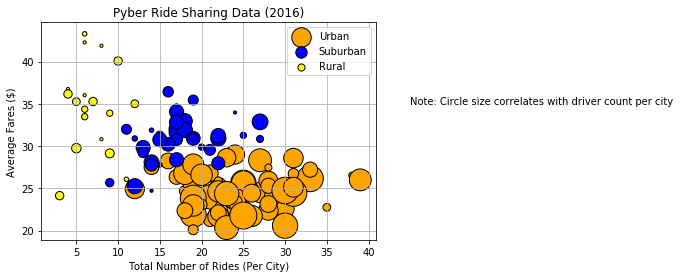

<Figure size 432x288 with 0 Axes>

In [40]:
# Obtain the x and y coordinates for each of the three city types
avg_fare_df_urban=city_ride_df.loc[city_ride_df['type']=='Urban'].groupby(by='city').mean()
total_rides_df_urban=city_ride_df.loc[city_ride_df['type']=='Urban'].groupby(by='city').count()
total_drivers_df_urban=city_ride_df.loc[city_ride_df['type']=='Urban'].groupby(by='city').mean()

#convert x and y to lists
avg_fares_urban = avg_fare_df_urban['fare'].tolist()

total_rides_urban=total_rides_df_urban['ride_id'].tolist()


num_drivers_urban=total_drivers_df_urban['driver_count']


# Build the scatter plots for each city types

plt.scatter(total_rides_urban,avg_fares_urban,s=num_drivers_urban*10,color="orange",edgecolors="black",label="Urban",marker='o')


avg_fare_df_suburban=city_ride_df.loc[city_ride_df['type']=='Suburban'].groupby(by='city').mean()
total_rides_df_suburban=city_ride_df.loc[city_ride_df['type']=='Suburban'].groupby(by='city').count()
total_drivers_df_suburban=city_ride_df.loc[city_ride_df['type']=='Suburban'].groupby(by='city').mean()

avg_fares_suburban = avg_fare_df_suburban['fare'].tolist()
total_rides_suburban=total_rides_df_suburban['ride_id'].tolist()
num_drivers_suburban=total_drivers_df_suburban['driver_count']
plt.scatter(total_rides_suburban,avg_fares_suburban,s=num_drivers_suburban*10,color="blue",edgecolors="black",label="Suburban",marker='o')


avg_fare_df_rural=city_ride_df.loc[city_ride_df['type']=='Rural'].groupby(by='city').mean()
total_rides_df_rural=city_ride_df.loc[city_ride_df['type']=='Rural'].groupby(by='city').count()
total_drivers_df_rural=city_ride_df.loc[city_ride_df['type']=='Rural'].groupby(by='city').mean()


avg_fares_rural = avg_fare_df_rural['fare'].tolist()
total_rides_rural=total_rides_df_rural['ride_id'].tolist()


num_drivers_rural=total_drivers_df_rural['driver_count']
plt.scatter(total_rides_rural,avg_fares_rural,s=num_drivers_rural*10,color="yellow",edgecolors="black",label="Rural",marker='o')


#groups = city_df.groupby('type')
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fares ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
plt.legend(mode="Expanded")
plt.text(45,35,"Note: Circle size correlates with driver count per city")
# Plot

#Note from Jimmy: I can't figure out how to figure out the size of the orange series

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
bubble_chart_one=plt.figure()

## Total Fares by City Type

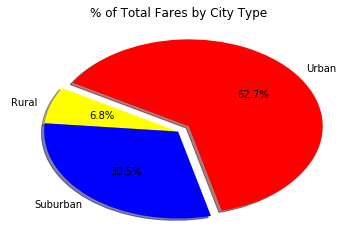

<Figure size 432x288 with 0 Axes>

In [38]:
# Calculate Type Percents
type_total=city_ride_df.groupby(by="type").sum()

# Build Pie Chart

total_fares=type_total['fare']

labels=list(type_total.index.values)

colors=['yellow','blue','red']

explode=[0,0,.1]

plt.pie(total_fares, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150,explode=explode)

plt.title("% of Total Fares by City Type")
# Save Figure
total_fares_pie=plt.figure()

In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

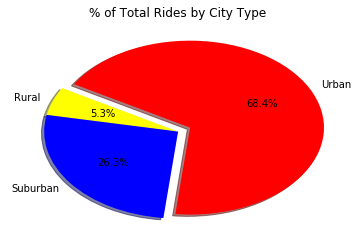

<Figure size 432x288 with 0 Axes>

In [9]:
# Calculate Ride Percents
type_count=city_ride_df.groupby(by="type").count()

# Build Pie Chart

total_rides=type_count['ride_id']

labels_rides=list(type_count.index.values)

colors_rides=['yellow','blue','red']

plt.pie(total_rides, labels=labels_rides, colors=colors_rides,
        autopct="%1.1f%%", shadow=True, startangle=150,explode=explode)

plt.title("% of Total Rides by City Type")
# Save Figure
total_rides_pie=plt.figure()


In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

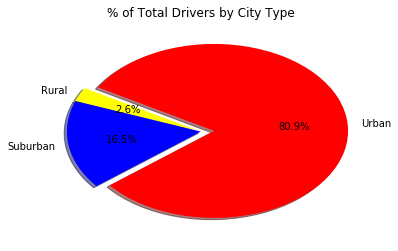

<Figure size 432x288 with 0 Axes>

In [11]:
# Calculate Driver Percents
city_drivers_df=city_df.groupby(by='type').sum()
# Build Pie Charts
total_drivers=city_drivers_df['driver_count']

labels_drivers=list(city_drivers_df.index.values)

colors_drivers=['yellow','blue','red']


total_drivers=plt.pie(total_drivers, labels=labels_drivers, colors=colors_drivers,
        autopct="%1.1f%%", shadow=True, startangle=150,explode=explode)

plt.title("% of Total Drivers by City Type")
# Save Figure
total_drivers_pie=plt.figure()


In [12]:
# Show Figure
plt.show()